# start with importing all the data and packages needed

In [1]:
#load all the relevant packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mlt

In [2]:
os.getcwd()

'C:\\Users\\cecilianatalie.strom\\GitHub\\INSA\\Opensanctions\\Clean'

In [3]:
cons = pd.read_csv('ofac_cons.csv',low_memory=False)

# import trigger data

In [4]:
#load trigger data
conflict = pd.read_csv('IV\\ucdp_cleaned.csv')
conflict_os = pd.read_csv('IV\\ucdp_os.csv')
coup= pd.read_csv('IV\\coup_data.csv')
terror= pd.read_csv('IV\\data_gti.csv')
protest= pd.read_csv('IV\\acled_clean.csv')

# us Consolidated Sanctions list

**descriptives**

In [5]:
data = cons.copy()
#get column names
print(data.columns)
print(data.describe())
print(data.schema.unique())
print(data.month.unique())
print(data.month.nunique())

print(data.date_stamp.unique())
print(data.date_stamp.nunique())
# receive information on missing values/ null values
is_null = data.isnull().sum()
print(is_null)


Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'schema', 'name', 'aliases',
       'birth_date', 'countries', 'addresses', 'identifiers', 'sanctions',
       'phones', 'emails', 'dataset', 'last_seen', 'first_seen', 'date_stamp',
       'last_change', 'new_entry', 'deletion', 'unchanged', 'month',
       'listing_count', 'listing_date', 'delisting_date', 'new_listing_count',
       'year_id', 'month_id'],
      dtype='object')
       Unnamed: 0.1  Unnamed: 0  phones    date_stamp  listing_count  \
count    956.000000  956.000000     0.0  9.560000e+02     956.000000   
mean     477.500000  477.500000     NaN  2.021173e+07     632.733264   
std      276.117729  276.117729     NaN  2.962260e+03     214.367505   
min        0.000000    0.000000     NaN  2.021082e+07     432.000000   
25%      238.750000  238.750000     NaN  2.021082e+07     432.000000   
50%      477.500000  477.500000     NaN  2.021092e+07     470.000000   
75%      716.250000  716.250000     NaN  2.021093e+07     867.000000 

In [6]:
data = data.sort_values(by=['month'])

In [7]:
data = data.drop(['Unnamed: 0.1', 'Unnamed: 0'],axis= 'columns')
data

,id,schema,name,aliases,birth_date,countries,addresses,identifiers,sanctions,phones,...,new_entry,deletion,unchanged,month,listing_count,listing_date,delisting_date,new_listing_count,year_id,month_id
955,ofac-cons-9716,Person,Qais Abdul KARIM,NaN,NaN,NaN,undetermined,NaN,Non-SDN Palestinian Legislative Council List -...,NaN,...,True,False,False,2021-08,432,20210820,NaN,1,2021,16
659,ofac-cons-18817,Company,MZ MAYAK OAO,MASHINOSTROITELNIY ZAVOD MAYAK;MAYAK MACHINE B...,NaN,ru,"Street Ibragimova, D. 31, Moscow, Russia, 105318",7719024042,Consolidated List - 13662 Sectoral Directive 3...,NaN,...,True,False,False,2021-08,432,20210820,NaN,1,2021,16
660,ofac-cons-18818,Company,ULYANOVSKI GIPROAVIAPROM OAO,OPEN JOINT-STOCK COMPANY ULYANOVSKIY GOSUDARST...,NaN,ru,"Street Vracha Mikhaylova, D. 34, Ulyanovsk, Ru...",7328046337,Consolidated List - 13662 Sectoral Directive 3...,NaN,...,True,False,False,2021-08,432,20210820,NaN,1,2021,16
661,ofac-cons-18819,Company,OBEDINENNAYA DVIGATELESTROITELNAYA KORPORATSIY...,ODK OAO;OTKRYTOE AKTSIONERNOE OBSHCHESTVO UPRA...,NaN,ru,"16 Budennogo prospekt, Moscow, Russia, 105118",1107746081717;7731644035,Consolidated List - 13662 Sectoral Directive 3...,NaN,...,True,False,False,2021-08,432,20210820,NaN,1,2021,16
662,ofac-cons-18820,Company,VERTOLETY ROSSII AO,OPEN JOINT STOCK COMPANY RUSSIAN HELICOPTERS;R...,NaN,ru,"12 Krasnopresnenskaya naberezhnaya, Moscow, Ru...",1077746003334;7731559044,Consolidated List - 13662 Sectoral Directive 3...,NaN,...,True,False,False,2021-08,432,20210820,NaN,1,2021,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,NK-Npc6EjzRb48JAWXACvDk4Z,Organization,Myanma Oil and Gas Enterprise,NaN,NaN,mm,"Building No. 6, Nay Pyi Taw;Complex No. 44, Na...",NaN,Consolidated List - Executive Order 14014;Non-...,NaN,...,True,False,False,2023-10,444,20231031,NaN,1,2023,9
425,NK-hBBv2dKYRznew7GzwNaUFe,Organization,Megvii Technology Limited,旷视科技有限公司,NaN,cn;ky,"Block A, Raycom Infotech Park, No. 2 Kexueyuan...",NaN,Consolidated List - Executive Order 14032 (CMI...,NaN,...,True,False,False,2023-11,447,20231120,NaN,1,2023,10
247,NK-QVoFrkW9AwhUunuZN8qjnW,Organization,"Cloudwalk Technology Co., Ltd.",CloudWalk;云从科技集团股份有限公司,NaN,cn,"Building 11, Zhangjiang Artificial Intelligenc...",914401153314442716,Consolidated List - Executive Order 14032 (CMI...,NaN,...,True,False,False,2023-11,447,20231120,NaN,1,2023,10
248,NK-QauhZsqPZgKTthaeUvHL7b,Organization,Ministry of Finance of the Russian Federation,Министерство Финансов Российской Федерации,NaN,ru,"9 Ilyinka Street, 109097 Moscow",NaN,Consolidated List - Executive Order 14024 (Rus...,NaN,...,True,False,False,2023-11,447,20231120,NaN,1,2023,10


In [8]:
print(data.listing_count.unique())

[432 867 433 441 473 470 447 455 451 450 446 444 445]


In [9]:
#get the number of listings per month
listing_month = data.groupby('month').new_listing_count.sum()
listing_month

month
2021-08    432
2021-09    435
2021-10      1
2021-12      9
2022-02     32
2022-03      9
2022-04     10
2022-05      1
2022-06      9
2022-07      7
2022-09      3
2022-12      2
2023-03      1
2023-10      1
2023-11      3
2023-12      1
Name: new_listing_count, dtype: int64

In [10]:
data['listing_month'] = data['new_listing_count'].groupby(data['month']).transform('sum')

In [11]:
print(data.listing_month.unique())

[432 435   1   9  32  10   7   3   2]


Text(0.5, 1.0, 'Accumulated monthly listings OFAC consolidated list')

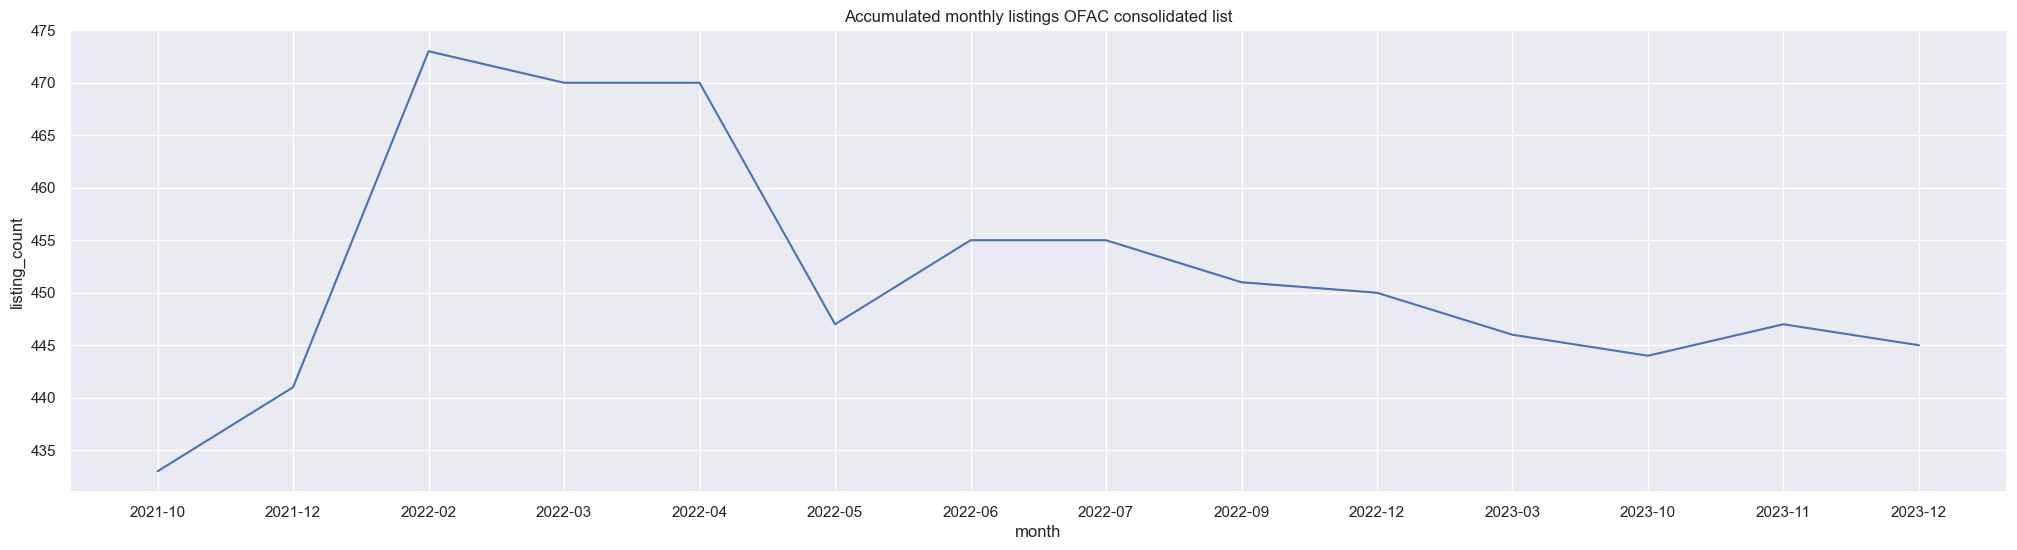

In [12]:
#get the total listings per month
data = data[data['month'] > '2021-09']
sns.set(rc={"figure.figsize":(25, 6)}) #width=3, #height=4
listings_us_cons = sns.lineplot(data=data,x='month',y='listing_count').set_title('Accumulated monthly listings OFAC consolidated list')
listings_us_cons.figure.savefig('timetrend_us_cons.png')
listings_us_cons

Text(0.5, 1.0, 'New monthly listings OFAC consolidated list')

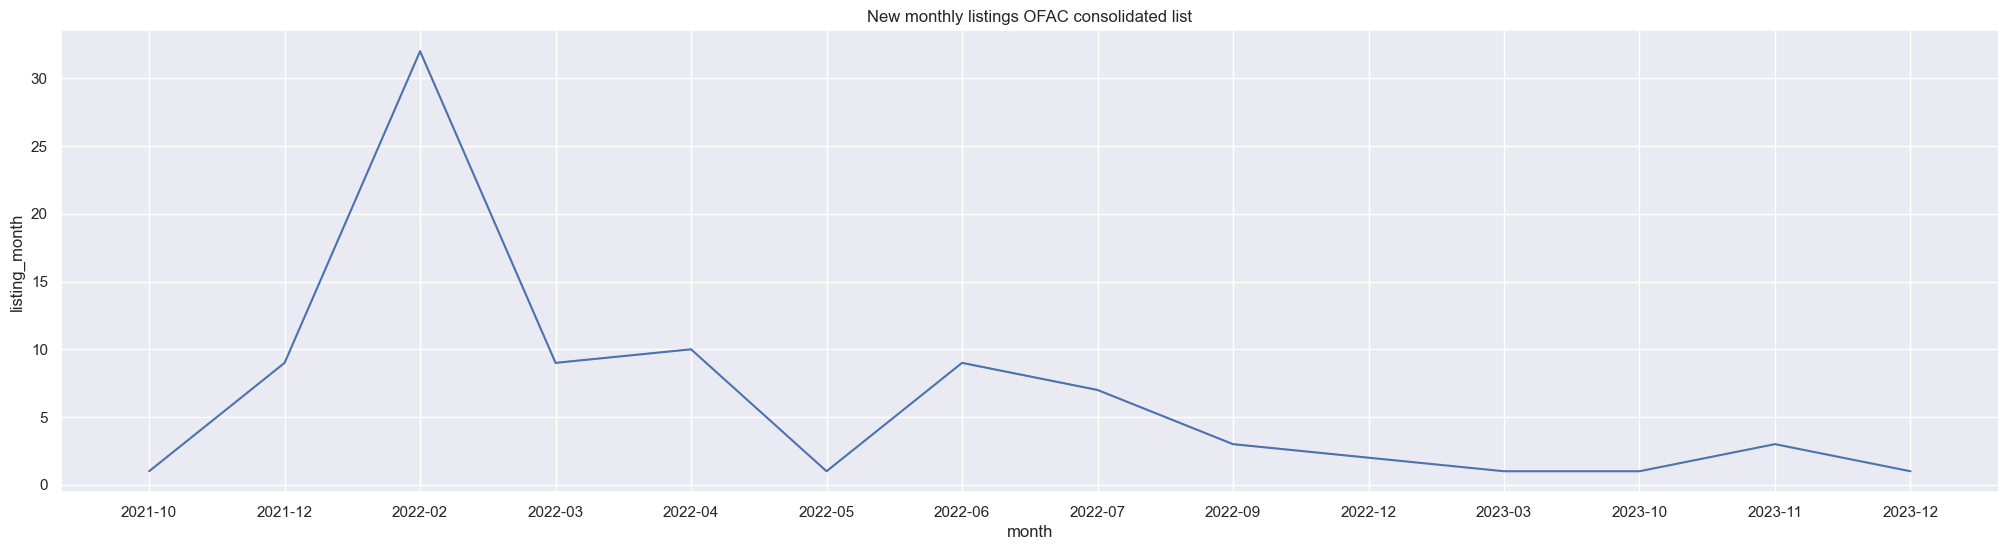

In [14]:
#get the total listings per month
sns.set(rc={"figure.figsize":(25, 6)}) #width=3, #height=4
listings_us_cons = sns.lineplot(data=data,x='month',y='listing_month').set_title('New monthly listings OFAC consolidated list')
listings_us_cons.figure.savefig('timetrend_us_cons.png')
listings_us_cons

In [16]:
data.countries.unique()

array(['ru', 'cn', 'cn;ky', 'cn;hk', 'ky', 'cy', 'ua', nan, 'mm', 'ps'],
      dtype=object)

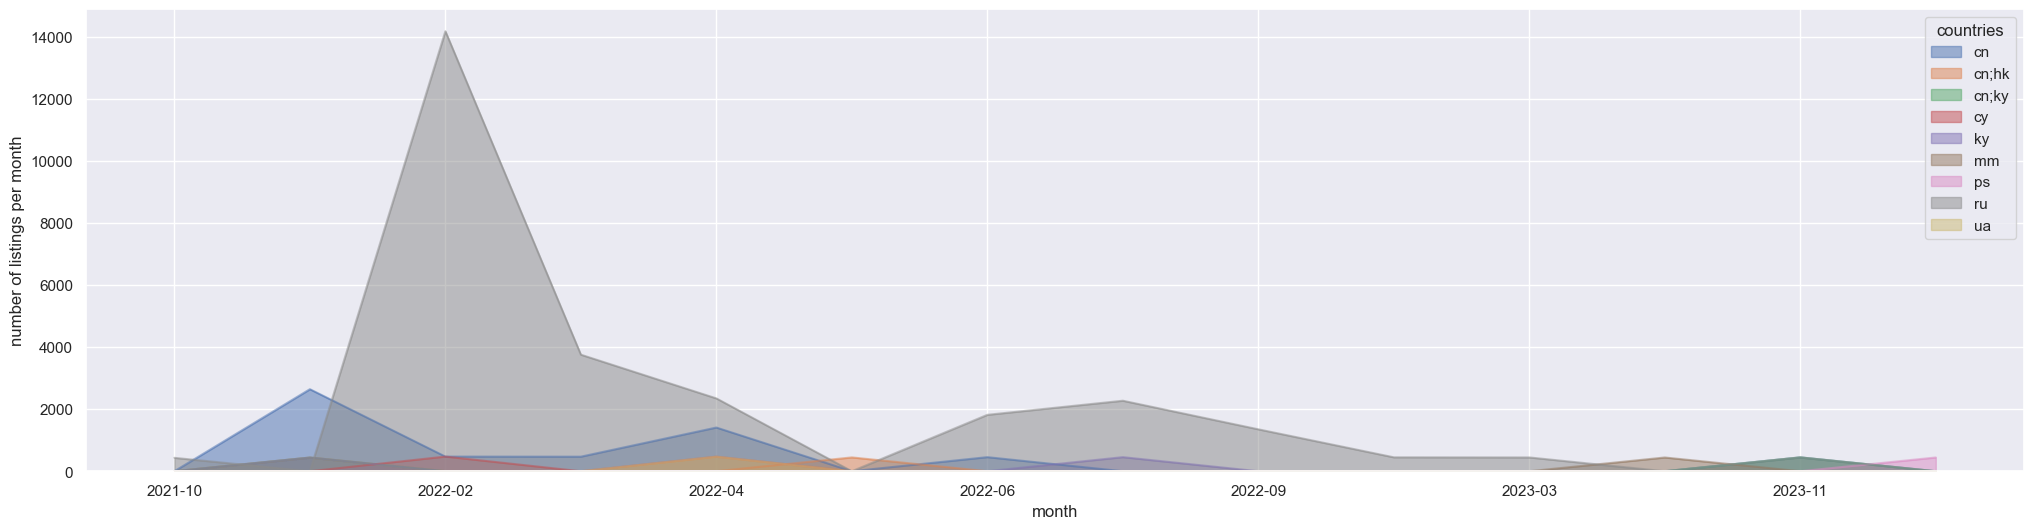

In [15]:
#time trend of the top iso codes
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
grouped2 = data.groupby(['countries', 'month']).agg({'listing_count': 'sum'})
top_countries2 = grouped2.groupby('countries').agg({'listing_count': 'sum'}).nlargest(10, 'listing_count').index.tolist()
filtered2 = grouped2[grouped2.index.get_level_values('countries').isin(top_countries2)]
pivoted2 = filtered2.reset_index().pivot(index='month', columns='countries', values='listing_count')
pivoted2.plot.area(stacked=False)

plt.xlabel('month')
plt.ylabel('number of listings per month')
plt.savefig('timetrend_us_cons_listings_unstacked.png')

# Show the plot
plt.show()

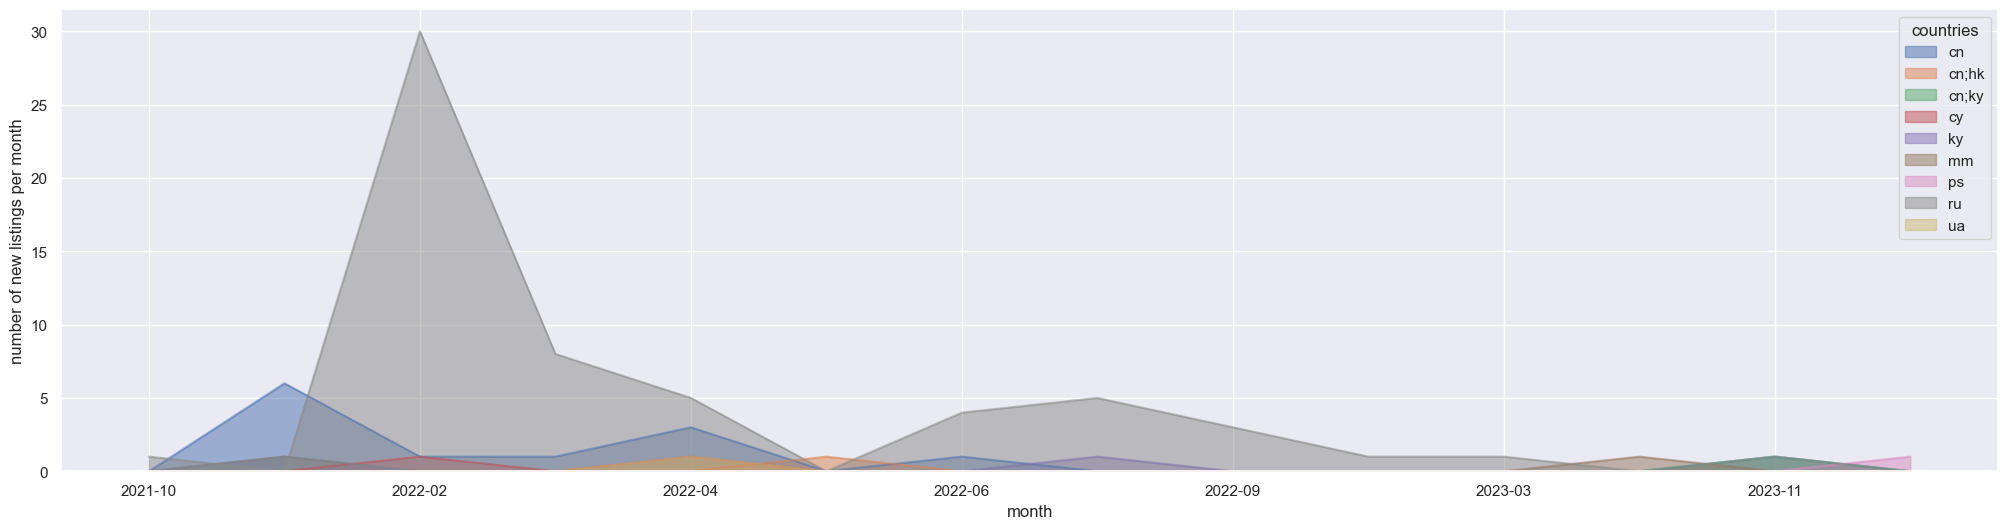

In [17]:
#time trend of the top iso codes
grouped2 = data.groupby(['countries', 'month']).agg({'new_listing_count': 'sum'})
top_countries2 = grouped2.groupby('countries').agg({'new_listing_count': 'sum'}).nlargest(10, 'new_listing_count').index.tolist()
filtered2 = grouped2[grouped2.index.get_level_values('countries').isin(top_countries2)]
pivoted2 = filtered2.reset_index().pivot(index='month', columns='countries', values='new_listing_count')
pivoted2.plot.area(stacked=False)

plt.xlabel('month')
plt.ylabel('number of new listings per month')
plt.savefig('timetrend_us_cons_new_listings_unstacked.png')

# Show the plot
plt.show()

In [18]:
#get the sates with the most new listings
data['listing_date'].value_counts().nlargest(10)

listing_date
20220225    18
20220226     9
20211217     8
20220608     4
20220223     3
20220305     3
20220411     3
20231120     3
20220903     3
20220612     2
Name: count, dtype: int64

In [19]:
#get the top shema
data['schema'].value_counts().nlargest(5)

schema
Organization    43
Company         39
Person           7
Name: count, dtype: int64

In [20]:
#get the top sanctions regime
data['sanctions'].value_counts().nlargest(15)

sanctions
Program - Consolidated List - Executive Order 14024 Directive 2 - Executive Order 14024 - 2022-02-24                                                                                                                                                                                                                                                                                             11
Consolidated List - CMIC Executive Order - Program - Executive Order 14032 (CMIC) - 2021-12-16;Non-SDN CMIC List - CMIC Executive Order - Program - Executive Order 14032 (CMIC) - 2021-12-16                                                                                                                                                                                                     8
Executive Order 14024 Directive 3 - Program - Consolidated List - Executive Order 14024 - 2022-02-24                                                                                                                  

**filter russia**

In [21]:
data_russ=data[data['countries'].str.contains("ru")==True]

In [22]:
data_russ2=data[data['sanctions'].str.contains("14024")==True]

In [23]:
data_russ2.countries.unique()

array(['ru', 'cy', 'ua'], dtype=object)

In [24]:
match= data_russ['countries'].equals(data_russ2['countries'])
print(match)

False


In [25]:
data_russ

,id,schema,name,aliases,birth_date,countries,addresses,identifiers,sanctions,phones,...,deletion,unchanged,month,listing_count,listing_date,delisting_date,new_listing_count,year_id,month_id,listing_month
343,NK-aKKzsxakvgsnHdeNdPfrC8,Company,OTKRYTOE AKTSIONERNOE OBSHCHESTVO VNESHNEEKONO...,JOINT STOCK COMPANY FOREIGN ECONOMIC ASSOCIATI...,NaN,ru,"d. 15 str. 2 ul. Novy Arbat, Moscow, 119019",02839043;1067746244026;7705713236,13662 Sectoral Directive 3 - Sectoral Sanction...,NaN,...,False,False,2021-10,433,20211003,NaN,1,2021,12,1
380,NK-dsd55siRTpDaWF6rNncy6G,Organization,PUBLIC JOINT STOCK COMPANY RUSHYDRO,FEDERAL HYDRO-GENERATING COMPANY RUSHYDRO OAO;...,NaN,ru,"23 Pravda St, Moscow, 127015;51, Republic Stre...",1042401810494;2460066195;2534005TJN9DX4YWVT97,Program - Executive Order 14024 Directive 3 - ...,NaN,...,False,False,2022-02,473,20220226,NaN,1,2022,3,32
518,ofac-34643,Company,IKS JOINT STOCK COMPANY,AO SZ IKS;Aktsionernoe Obshchestvo Spetsializi...,NaN,ru,"33 Oktyabrskaya St, Nizhny Novgorod, 603005",1025203020424;5263023906,Program - Consolidated List - Executive Order ...,NaN,...,False,False,2022-02,473,20220225,NaN,1,2022,3,32
99,NK-9MSZY4BHSzhPr2rjHWATPp,Company,JOINT STOCK COMPANY ALFA-BANK,ALFA-BANK;AO ALFA-BANK;JSC ALFA-BANK;OPEN JOIN...,NaN,ru,"27, Kalanchyovskaya Ul., Moscow, 107078;Kalanc...",1027700067328;7728168971;ALFARUMM,Program - Executive Order 14024 Directive 3 - ...,NaN,...,False,False,2022-02,473,20220226,NaN,1,2022,3,32
519,ofac-34644,Organization,PUBLIC JOINT STOCK COMPANY ALROSA,AK ALROSA PAO;ALROSA Group;PJSC ALROSA;АК АЛРО...,NaN,ru,"24 Ozerkovskaya Naberezhnaya, Moscow, 115184;6...",1021400967092;1433000147;894500DKUWVBYZLLE651,Executive Order 14024 Directive 3 - Program - ...,NaN,...,True,False,2022-02,473,20220225,20220225.0,1,2022,3,32
520,ofac-34682,Company,JOINT STOCK COMPANY ALFA-BANK,ALFA-BANK;AO ALFA-BANK;JSC ALFA-BANK;OPEN JOIN...,NaN,ru,"27, Kalanchyovskaya Ul., Moscow, 107078;Kalanc...",1027700067328;7728168971;ALFARUMM,Executive Order 14024 Directive 3 - Program - ...,NaN,...,True,False,2022-02,473,20220225,20220225.0,1,2022,3,32
521,ofac-34736,Organization,OPEN JOINT STOCK COMPANY RUSSIAN RAILWAYS,JSC RZD;JSC Russian Railways;RZhD;Russian Rail...,NaN,ru,"Novaya Basmannaya Street, 2, Moscow, 107174",1037739877295;253400XX5U3XALBF5728;7708503727,Executive Order 14024 Directive 3 - Program - ...,NaN,...,False,False,2022-02,473,20220225,NaN,1,2022,3,32
15,NK-3PCZXM69gdrPSkq9dtZyep,Organization,Central Bank of the Russian Federation,"Bank Rossi, Federal State Budgetary Institutio...",NaN,ru,"Moscow;Neglinnaya St 12, Moscow, 107016",00032253;1037700013020;7702235133;CBRFRUMM,Non-SDN Menu-Based Sanctions List - Executive ...,NaN,...,False,False,2022-02,473,20220226,NaN,1,2022,3,32
522,ofac-34741,Organization,JOINT STOCK COMPANY SOVCOMFLOT,JSC Sovcomflot;PAO Sovcomflot;Publichnoe Aktsi...,NaN,ru,"Nab. Reki Moiki d.3, Lit. A, Saint Petersburg,...",1027739028712;7702060116,Executive Order 14024 Directive 3 - Program - ...,NaN,...,True,False,2022-02,473,20220225,20220225.0,1,2022,3,32
523,ofac-35163,Company,CREDIT BANK OF MOSCOW PUBLIC JOINT STOCK COMPANY,Credit Bank of Moscow;Credit Bank of Moscow PJ...,NaN,ru,"Lukov pereulok 2, bldg. 1, Moscow, 107045",1027739555282;7734202860;MCRBRUMM,Executive Order 14024 Directive 3 - Program - ...,NaN,...,False,False,2022-02,473,20220225,NaN,1,2022,3,32


[Text(0.5, 1.0, 'new RUSSIA listings per month, OFAC SDN list')]

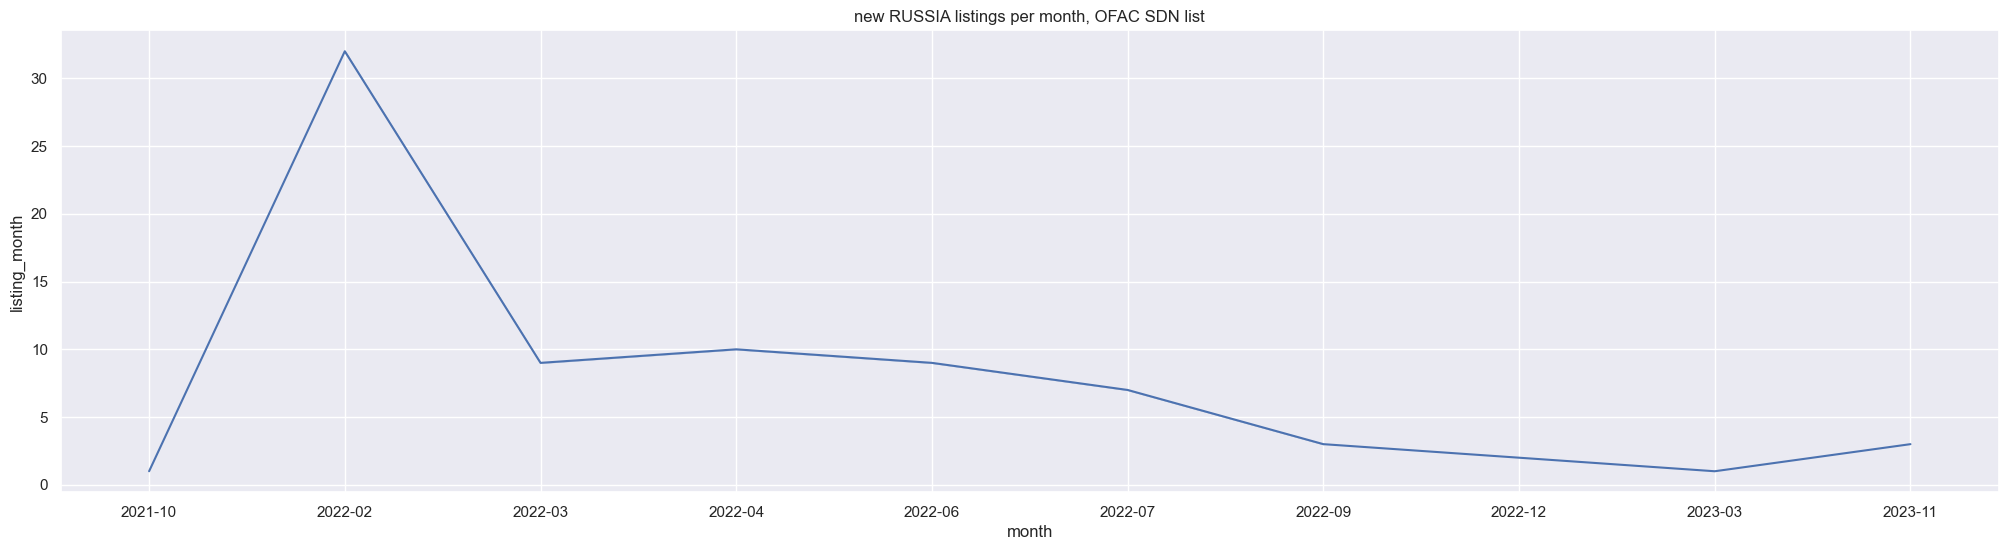

In [26]:
#make wider and remove outliers
data_russ = data_russ[data_russ['month'] > '2021-09']
sns.set(rc={"figure.figsize":(25, 6)}) #width=3, #height=4
plot_russ = sns.lineplot(data=data_russ,x='month',y='listing_month').set(title="new RUSSIA listings per month, OFAC SDN list")
plot_russ

[Text(0.5, 1.0, 'RUSSIA listings per month accumulated, OFAC SDN list')]

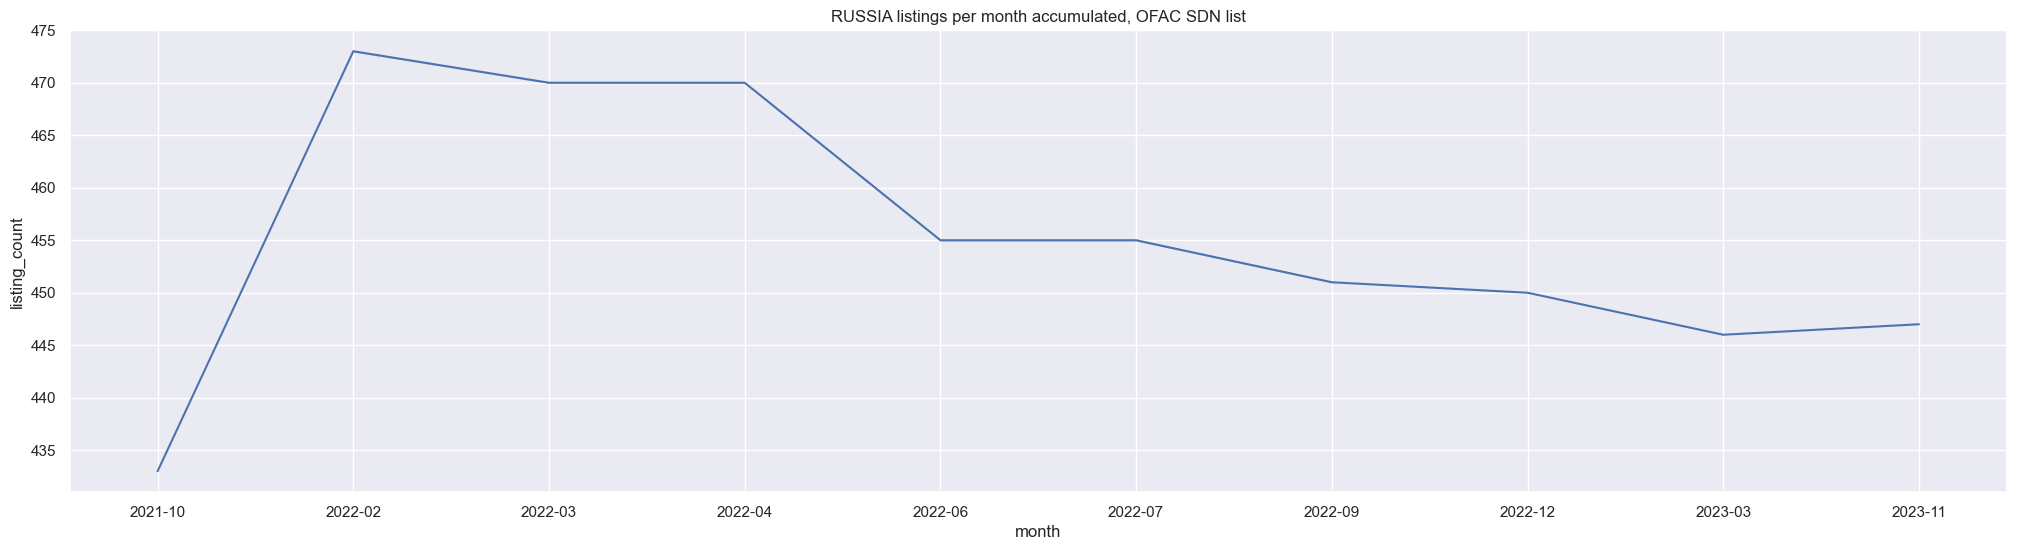

In [27]:
#make wider and remove outliers
data_russ = data_russ[data_russ['month'] > '2021-09']
sns.set(rc={"figure.figsize":(25, 6)}) #width=3, #height=4
plot_russ = sns.lineplot(data=data_russ,x='month',y='listing_count').set(title="RUSSIA listings per month accumulated, OFAC SDN list")
plot_russ

[Text(0.5, 1.0, 'new listings for exec order 14024 (Russia) per month, OFAC SDN list')]

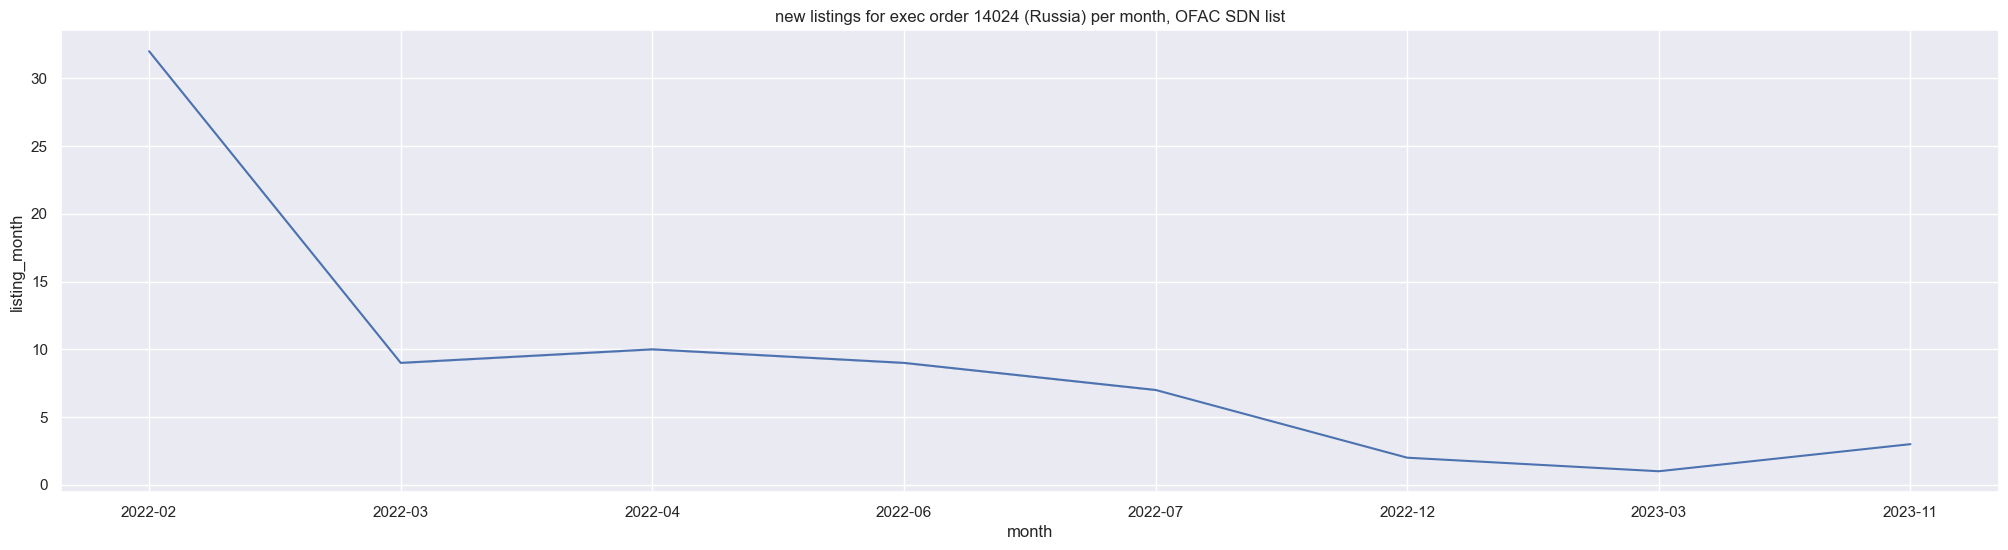

In [28]:
#make wider and remove outliers
data_russ2 = data_russ2[data_russ2['month'] > '2021-09']
sns.set(rc={"figure.figsize":(25, 6)}) #width=3, #height=4
plot_russ2 = sns.lineplot(data=data_russ2,x='month',y='listing_month').set(title="new listings for exec order 14024 (Russia) per month, OFAC SDN list")
plot_russ2

[Text(0.5, 1.0, 'listings for exec order 14024 (Russia) per month accumulated, OFAC SDN list')]

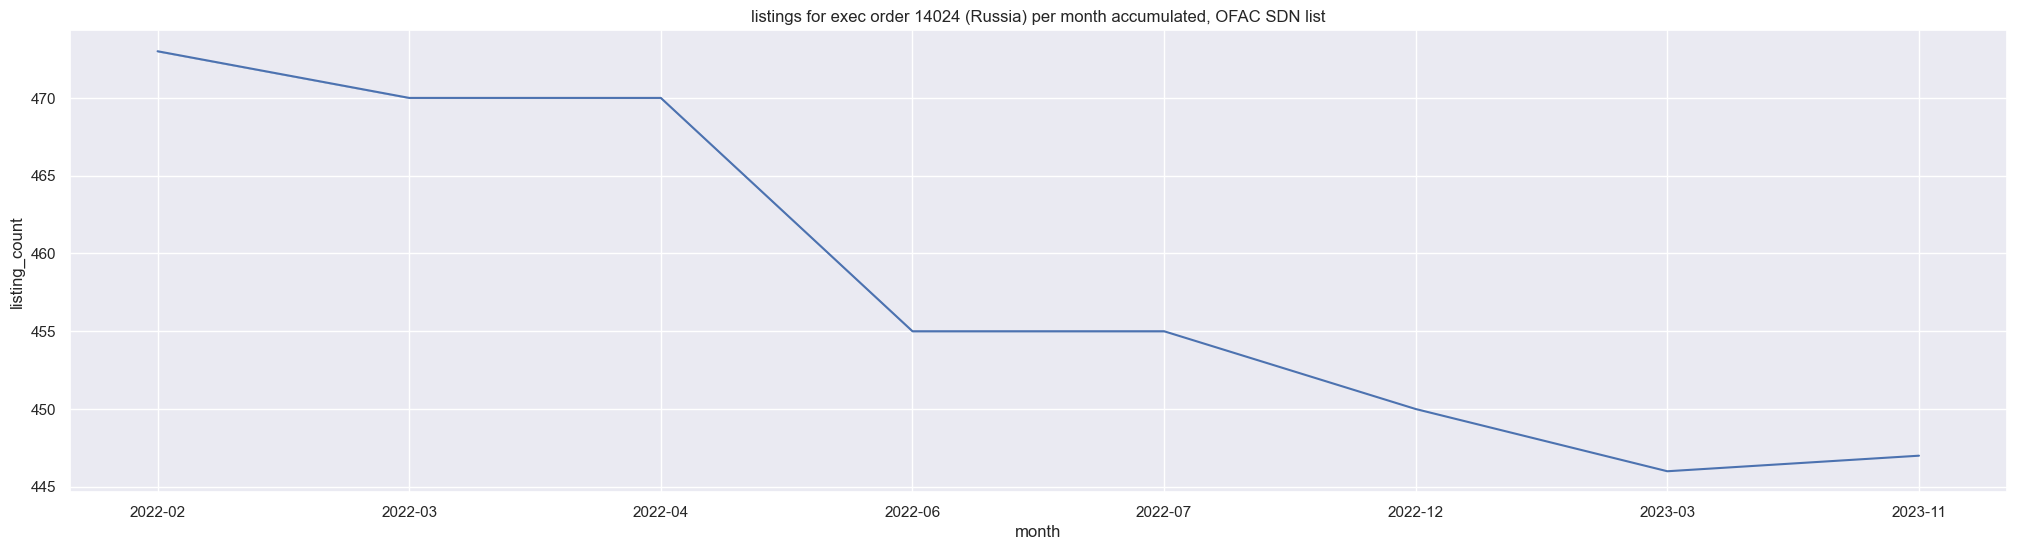

In [29]:
#make wider and remove outliers
data_russ2 = data_russ2[data_russ2['month'] > '2021-09']
sns.set(rc={"figure.figsize":(25, 6)}) #width=3, #height=4
plot_russ2 = sns.lineplot(data=data_russ2,x='month',y='listing_count').set(title="listings for exec order 14024 (Russia) per month accumulated, OFAC SDN list")
plot_russ2

# add trigger events

In [30]:
conflict.describe
# get a month id
conflict['month'] = pd.to_datetime(conflict['conflict_event']).dt.to_period('M')
conflict_os['month'] = pd.to_datetime(conflict_os['conflict_event']).dt.to_period('M')

In [31]:
print(conflict.columns)
conflict = conflict.sort_values(by=['month'])
print(conflict)
print(conflict_os.columns)
conflict_os = conflict_os.sort_values(by=['month'])
print(conflict_os)
print(protest.columns)
protest = protest.sort_values(by=['month'])
print(protest)

Index(['Unnamed: 0', 'id', 'relid', 'year', 'type_of_violence', 'country',
       'country_id', 'fatality_best_estimate', 'gwnoa', 'gwnob',
       'conflict_event', 'iso', 'month'],
      dtype='object')
      Unnamed: 0      id                 relid  year  type_of_violence  \
1507       85255  327584    DRC-2020-2-15650-0  2020               2.0   
1872       85722  325549    DRC-2020-3-16065-4  2020               3.0   
1873       85723  327127    DRC-2020-3-16065-5  2020               3.0   
1542       85310  325162    DRC-2020-2-15892-0  2020               2.0   
997        83689  377179   DRC-2020-1-10509-21  2020               1.0   
...          ...     ...                   ...   ...               ...   
957        83165  460439    DRC-2022-3-2434-27  2022               3.0   
956        83164  460230    DRC-2022-3-2434-26  2022               3.0   
894        81915  460094    AFG-2022-3-973-669  2022               3.0   
2798       86694  460325    DRC-2022-2-17417-5  2022    

In [32]:
import scipy
from scipy import stats
import statsmodels
#conflict fatalities
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(conflict.dropna()['fatality_best_estimate'],data.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(conflict['fatality_best_estimate'],data['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)

T-Test Results:
T-statistic: nan
P-value: nan

ANOVA Results:
F-statistic: nan
P-value (ANOVA): nan


In [33]:
#one-sided violence
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(conflict_os.dropna()['fatality_best_estimate'],data.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(conflict_os['fatality_best_estimate'],data['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)

T-Test Results:
T-statistic: nan
P-value: nan

ANOVA Results:
F-statistic: 230.45030999876028
P-value (ANOVA): 4.105365274925113e-49


In [34]:
#protest events
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(protest.dropna()['event_count'],data.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(protest['event_count'],data['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)

T-Test Results:
T-statistic: nan
P-value: nan

ANOVA Results:
F-statistic: 1135.7977685250416
P-value (ANOVA): 2.532547747623852e-243


**now plot the association**

In [35]:
#transfrom month to string
conflict['month'] = conflict['month'].astype(str)
#conflict['month'] = pd.to_datetime(conflict['month'])
conflict.month.dtypes

conflict_os['month'] = conflict_os['month'].astype(str)
conflict_os.month.dtypes

protest['month'] = protest['month'].astype(str)
protest.month.dtypes

dtype('O')

In [36]:
#get the new listings per month toether with conflict fatalities and protest events
# combined plot
grouped_1 = data.groupby(['month']).agg({'new_listing_count': 'sum'})
grouped_2 = conflict.groupby(['month']).agg({'fatality_best_estimate': 'sum'})
grouped_3 = conflict_os.groupby(['month']).agg({'fatality_best_estimate': 'sum'})
grouped_4 = protest.groupby(['month']).agg({'event_count': 'sum'})
grouped_1 = grouped_1.reset_index()
grouped_2 = grouped_2.reset_index()
grouped_3 = grouped_3.reset_index()
grouped_4 = grouped_4.reset_index()

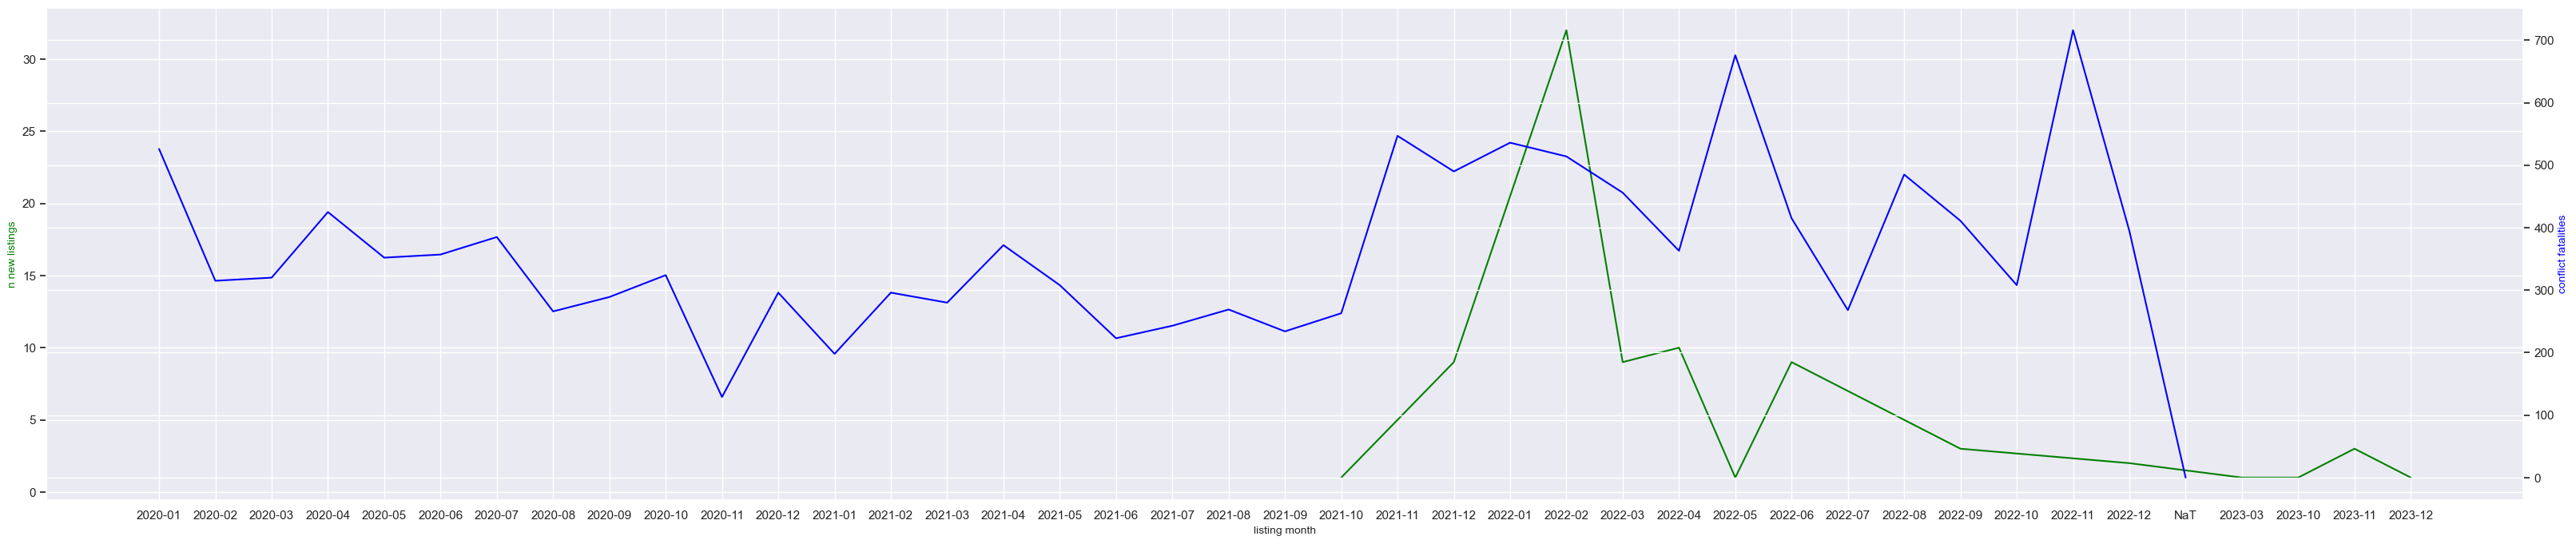

In [37]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(40,8))
# make a plot
ax.plot(grouped_1.month,
        grouped_1.new_listing_count,
        color="green")
# set x-axis label
ax.set_xlabel("listing month", fontsize = 10)
# set y-axis label
ax.set_ylabel("n new listings",
              color="green",
              fontsize=10)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(grouped_2.month, grouped_2["fatality_best_estimate"],color="blue")
ax2.set_ylabel("conflict fatalities",color="blue",fontsize=10)
plt.savefig('timetrend_ofac_cons_combined_conflict.png')
plt.show()

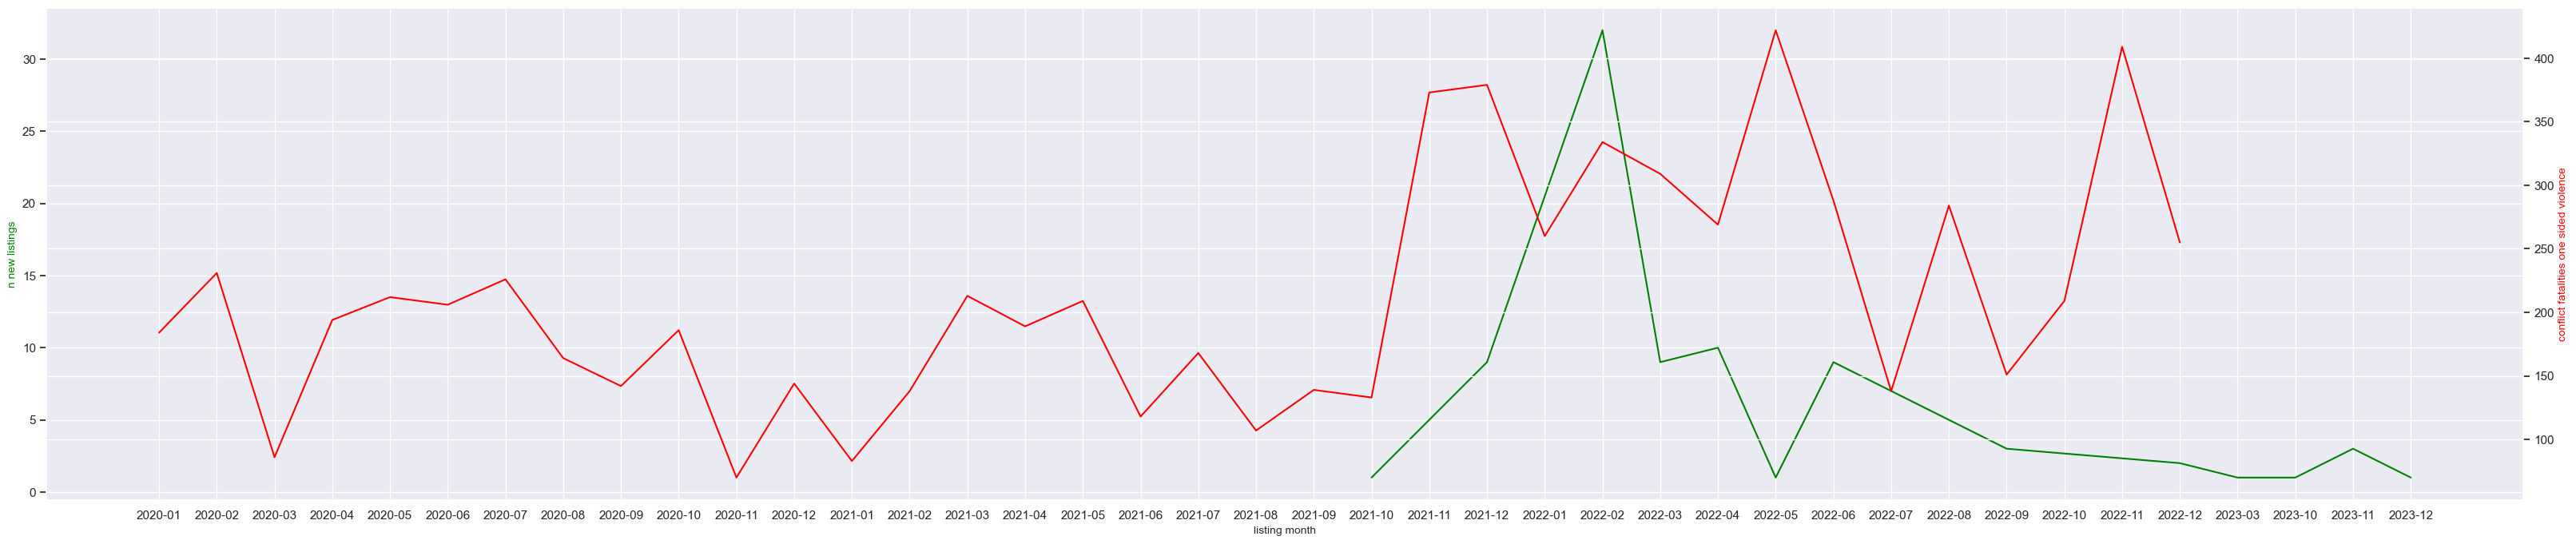

In [38]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(40,8))
# make a plot
ax.plot(grouped_1.month,
        grouped_1.new_listing_count,
        color="green")
# set x-axis label
ax.set_xlabel("listing month", fontsize = 10)
# set y-axis label
ax.set_ylabel("n new listings",
              color="green",
              fontsize=10)
# twin object for two different y-axis on the sample plot
ax3=ax.twinx()
# make a plot with different y-axis using second axis object
ax3.plot(grouped_3.month, grouped_3["fatality_best_estimate"],color="red")
ax3.set_ylabel("conflict fatalities one sided violence",color="red",fontsize=10)
plt.savefig('timetrend_ofac_cons_combined_conflict_os.png')

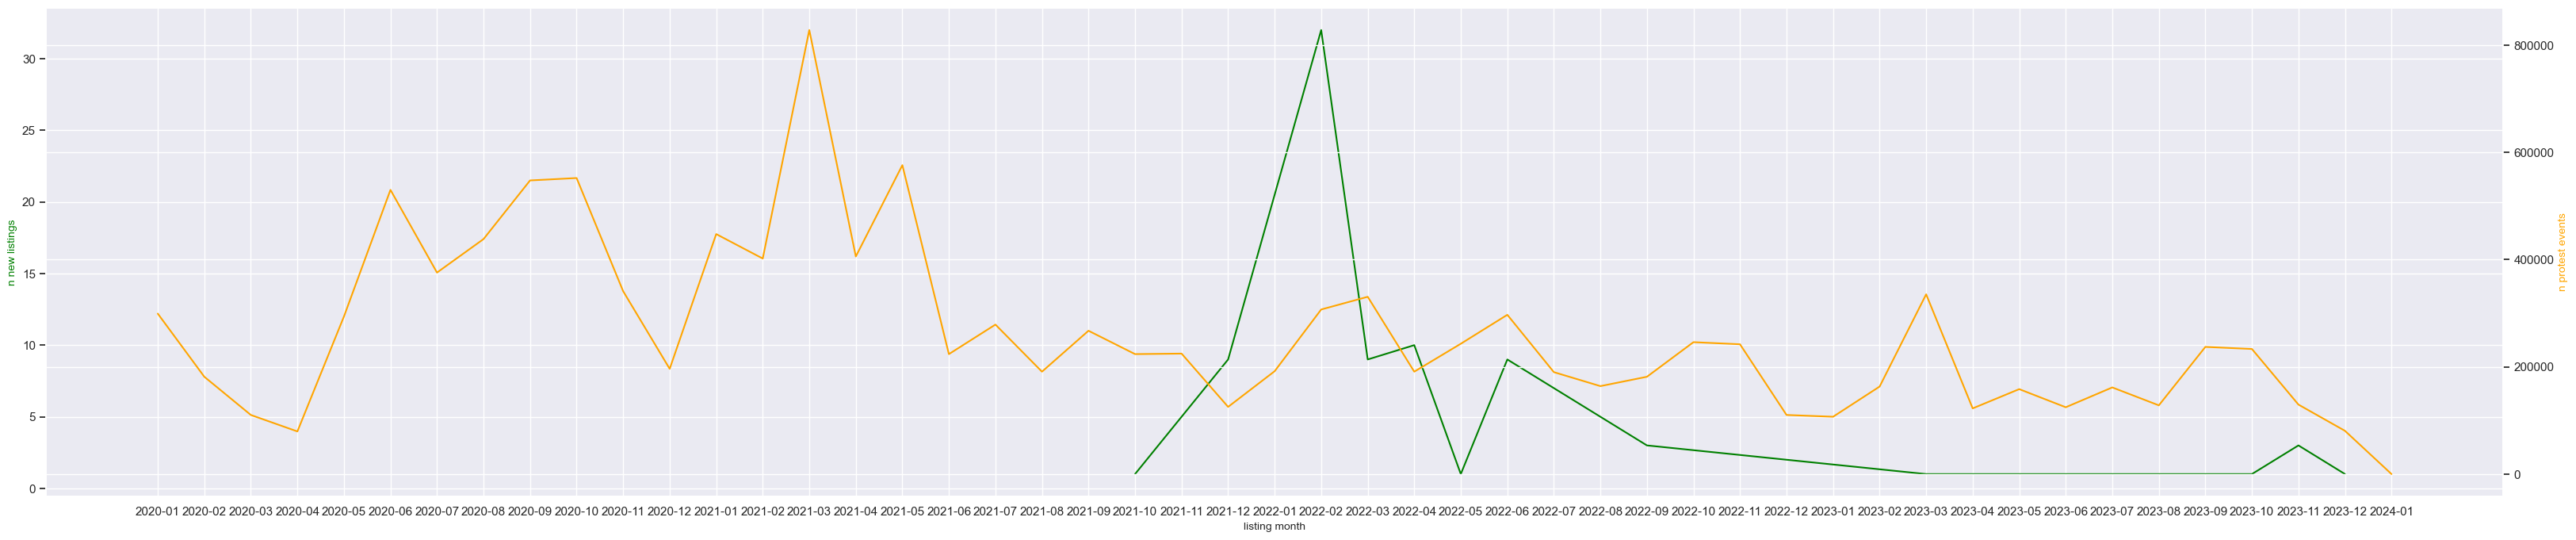

In [39]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(40,8))
# make a plot
ax.plot(grouped_1.month,
        grouped_1.new_listing_count,
        color="green")
# set x-axis label
ax.set_xlabel("listing month", fontsize = 10)
# set y-axis label
ax.set_ylabel("n new listings",
              color="green",
              fontsize=10)
# twin object for two different y-axis on the sample plot
ax4=ax.twinx()
# make a plot with different y-axis using second axis object
ax4.plot(grouped_4.month, grouped_4["event_count"],color="orange")
ax4.set_ylabel("n protest events",color="orange",fontsize=10)
plt.savefig('timetrend_ofac_cons_combined_protest.png')

**now for russia case study**

In [40]:
import scipy
from scipy import stats
import statsmodels
#conflict fatalities
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(conflict.dropna()['fatality_best_estimate'],data_russ.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results conflict fatalities:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(conflict['fatality_best_estimate'],data_russ['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results conflict fatalities:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)


#conflict fatalities OS violence
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(conflict_os.dropna()['fatality_best_estimate'],data_russ.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results os_violence:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(conflict_os['fatality_best_estimate'],data_russ['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results os_violence:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)


#Protest events
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(protest.dropna()['event_count'],data_russ.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results protest:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(protest['event_count'],data_russ['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results protest:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)

T-Test Results conflict fatalities:
T-statistic: nan
P-value: nan

ANOVA Results conflict fatalities:
F-statistic: nan
P-value (ANOVA): nan
T-Test Results os_violence:
T-statistic: nan
P-value: nan

ANOVA Results os_violence:
F-statistic: 270.2939934952222
P-value (ANOVA): 1.0795225482110688e-56
T-Test Results protest:
T-statistic: nan
P-value: nan

ANOVA Results protest:
F-statistic: 742.5477524753829
P-value (ANOVA): 4.743558292191438e-161


In [41]:
#conflict fatalities
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(conflict.dropna()['fatality_best_estimate'],data_russ2.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results conflict fatalities:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(conflict['fatality_best_estimate'],data_russ2['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results conflict fatalities:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)


#conflict fatalities OS violence
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(conflict_os.dropna()['fatality_best_estimate'],data_russ2.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results one-sided violence:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(conflict_os['fatality_best_estimate'],data_russ2['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results one-sided violence:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)


#Protest events
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(protest.dropna()['event_count'],data_russ2.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results protest events:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(protest['event_count'],data_russ2['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results protest events:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)

T-Test Results conflict fatalities:
T-statistic: nan
P-value: nan

ANOVA Results conflict fatalities:
F-statistic: nan
P-value (ANOVA): nan
T-Test Results one-sided violence:
T-statistic: nan
P-value: nan

ANOVA Results one-sided violence:
F-statistic: 329.68188430154254
P-value (ANOVA): 9.320334016649504e-68
T-Test Results protest events:
T-statistic: nan
P-value: nan

ANOVA Results protest events:
F-statistic: 622.3051900366709
P-value (ANOVA): 1.264587543389589e-135


**now only try for data between 2021 and 2022

In [42]:
#filter the listings
data_limit = data.copy()
data_limit = data_limit[data_limit['month'] < '2023-01']
data_limit.month.unique()

array(['2021-10', '2021-12', '2022-02', '2022-03', '2022-04', '2022-05',
       '2022-06', '2022-07', '2022-09', '2022-12'], dtype=object)

In [43]:
#filter the trigger events
conflict_limit = conflict.copy()
conflict_limit = conflict_limit[conflict_limit['month'] > '2021-09']
print(conflict_limit.month.unique())

conflict_os_limit = conflict_os.copy()
conflict_os_limit = conflict_os_limit[conflict_os_limit['month'] > '2021-09']
print(conflict_os_limit.month.unique())

protest_limit = protest.copy()
protest_limit = protest_limit[protest_limit['month'] > '2021-09']
protest_limit = protest_limit[protest_limit['month'] < '2023-01']
print(protest_limit.month.unique())

['2021-10' '2021-11' '2021-12' '2022-01' '2022-02' '2022-03' '2022-04'
 '2022-05' '2022-06' '2022-07' '2022-08' '2022-09' '2022-10' '2022-11'
 '2022-12' 'NaT']
['2021-10' '2021-11' '2021-12' '2022-01' '2022-02' '2022-03' '2022-04'
 '2022-05' '2022-06' '2022-07' '2022-08' '2022-09' '2022-10' '2022-11'
 '2022-12']
['2021-10' '2021-11' '2021-12' '2022-01' '2022-02' '2022-03' '2022-04'
 '2022-05' '2022-06' '2022-07' '2022-08' '2022-09' '2022-10' '2022-11'
 '2022-12']


In [44]:
#conflict fatalities
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(conflict_limit.dropna()['fatality_best_estimate'],data_limit.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results conflict fatalities:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(conflict_limit['fatality_best_estimate'],data_limit['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results conflict fatalities:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)


#conflict fatalities OS violence
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(conflict_os_limit.dropna()['fatality_best_estimate'],data_limit.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results one-sided violence:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(conflict_os_limit['fatality_best_estimate'],data_limit['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results one-sided violence:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)


#Protest events
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(protest_limit.dropna()['event_count'],data_limit.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results protest events:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(protest_limit['event_count'],data_limit['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results protest events:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)

T-Test Results conflict fatalities:
T-statistic: nan
P-value: nan

ANOVA Results conflict fatalities:
F-statistic: nan
P-value (ANOVA): nan
T-Test Results one-sided violence:
T-statistic: nan
P-value: nan

ANOVA Results one-sided violence:
F-statistic: 197.58547643718134
P-value (ANOVA): 3.4883047405205643e-41
T-Test Results protest events:
T-statistic: nan
P-value: nan

ANOVA Results protest events:
F-statistic: 4064.3777527082025
P-value (ANOVA): 0.0
